## Proceso de ETL y EDA

In [2]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline
sns.set()

In [12]:
# Descargamos los datos de S&P500 mediante la librería yfinance, desde fecha deseada hasta la actualidad.
sp_500 = yf.download('^GSPC', start='2000-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [16]:
# Analizamos el encabezado del dataframe
sp_500.head()

,Date,Adj Close,Year,Month,Day
0,1957-01-02,46.200001,1957,1,Wednesday
1,1957-01-03,46.599998,1957,1,Thursday
2,1957-01-04,46.660000,1957,1,Friday
3,1957-01-07,46.419998,1957,1,Monday
4,1957-01-08,46.250000,1957,1,Tuesday


In [4]:
# Tamaño del dataframe
sp_500.shape

(5847, 6)

In [5]:
# Analizamos la cantidad de registros: 5844, columnas:6, tipos de datos: float64(5), int64(1)
sp_500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5847 entries, 2000-01-03 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5847 non-null   float64
 1   High       5847 non-null   float64
 2   Low        5847 non-null   float64
 3   Close      5847 non-null   float64
 4   Adj Close  5847 non-null   float64
 5   Volume     5847 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 319.8 KB


In [7]:
# No se observan valores vacíos
sp_500.isnull().sum()

0

In [8]:
# No se observan valores duplicados
sp_500.duplicated().sum()

2624

In [14]:
# Cambio los índices agregando a la fecha como nueva columna
sp_500= sp_500.reset_index()

In [15]:
# Agrego columnas de días mes y año, para un análisis posterior
sp_500['Year'] = sp_500.Date.dt.year 
sp_500['Month'] = sp_500.Date.dt.month
sp_500['Day'] = sp_500.Date.dt.strftime('%A')

In [10]:
# Realizamos webscraping para obtener los símbolos de las acciones del S&P 500 junto con su sector, subsector y locación

URL = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

sp_500_companies = pd.read_html(URL)[0][['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location']]

# Renombramos las columnas
sp_500_companies.rename(columns={'GICS Sector': 'Sector', 'GICS Sub-Industry': 'Sub-Industry', 'Headquarters Location': 'Location' }, inplace=True)

In [11]:
# Creamos un nuevo dataframe el cual posee únicamente el sector 'Health Care'
sp_500_companies_h = sp_500_companies[sp_500_companies.Sector == 'Health Care']
sp_500_companies_h.head()

,Symbol,Security,Sector,Sub-Industry,Location
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois"
12,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California"
18,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona"
36,ABC,AmerisourceBergen,Health Care,Health Care Distributors,"Conshohocken, Pennsylvania"


In [13]:
# Creamos una lista con los symbols del dataframe antes creado
sp_500_h_symbols = sp_500_companies_h.Symbol.tolist()

# Creamos un DataFrame vacío para almacenar los datos de cada compañía
sp_500_h = pd.DataFrame()

# Iterarmos por el symbol de cada compañia del SP500 y agregamos los datos al Dataframe creado
for symbol in sp_500_h_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.download(symbol, start='2000-01-01')
    if len(data) > 0:
        data['Symbol'] = symbol
        sp_500_h = pd.concat([sp_500_h, data], axis=0)

Descargando datos para ABT...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABBV...
[*********************100%***********************]  1 of 1 completed
Descargando datos para A...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ALGN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para ABC...
[*********************100%***********************]  1 of 1 completed
Descargando datos para AMGN...
[*********************100%***********************]  1 of 1 completed
Descargando datos para BAX...
[*********************100%***********************]  1 of 1 completed
Descargando datos para BDX...
[*********************100%***********************]  1 of 1 completed
Descargando datos para BIO...
[*********************100%***********************]  1 of 1 completed
Descargando datos para TECH...
[*********************100%***********************]  1 of 1 completed
Descarga

In [ ]:
# Analizamos el encabezado del dataframe
sp_500_h.head(3)

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2000-01-03,15.823756,16.160433,15.599306,15.711531,9.221025,10635087,ABT
2000-01-04,15.459024,15.599306,15.150405,15.262630,8.957568,10734887,ABT
2000-01-05,15.066236,15.402911,15.066236,15.234574,8.941102,11722632,ABT


In [14]:
# Tamaño del dataframe
sp_500_h.shape

(341647, 7)

In [ ]:
# Analizamos la cantidad de registros: 341452, columnas:6, tipos de datos: float64(5), int64(1), object(1)
sp_500_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 341452 entries, 2000-01-03 to 2023-03-24
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       341452 non-null  float64
 1   High       341452 non-null  float64
 2   Low        341452 non-null  float64
 3   Close      341452 non-null  float64
 4   Adj Close  341452 non-null  float64
 5   Volume     341452 non-null  int64  
 6   Symbol     341452 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 20.8+ MB


In [ ]:
# No se observan valores vacíos
sp_500_h.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [ ]:
# Se observan 2 valores duplicados
sp_500_h.duplicated().sum()

2

In [15]:
# Se eliminan los valores duplicados
sp_500_h.drop_duplicates(inplace=True)

In [16]:
# Cambio los índices agregando a la fecha como una nueva columna
sp_500_h= sp_500_h.reset_index()

In [17]:
# Uno por el campo "Symbol" el daframe de las compañias con el recien generado
sp_500_h = pd.merge(sp_500_h, sp_500_companies_h, on='Symbol')
sp_500_h.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,Sector,Sub-Industry,Location
0,2000-01-03,15.823756,16.160433,15.599306,15.711531,9.221025,10635087,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"
1,2000-01-04,15.459024,15.599306,15.150405,15.262630,8.957568,10734887,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"
2,2000-01-05,15.066236,15.402911,15.066236,15.234574,8.941108,11722632,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"
3,2000-01-06,15.262630,15.823756,15.178461,15.767643,9.253956,17479583,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"
4,2000-01-07,15.487080,16.272657,15.487080,15.935981,9.352752,15756040,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois"


In [21]:
# Agrego columnas de días, mes y año, para un análisis posterior
sp_500_h['Year'] = sp_500_h.Date.dt.year 
sp_500_h['Month'] = sp_500_h.Date.dt.month
sp_500_h['Day'] = sp_500_h.Date.dt.strftime('%A')

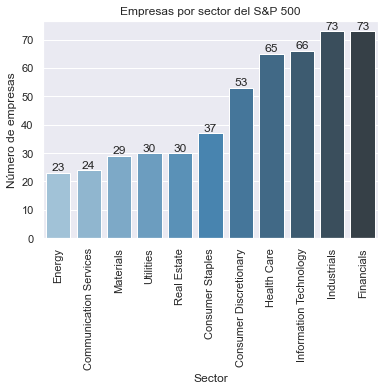

In [18]:
# Cantidad de empresas por sector

# Obtenemos el total de empresas por sector
companie_sector = sp_500_companies.Sector.value_counts( ascending = True)

# Graficamos el total de empresas por sector
ax = sns.barplot(x=companie_sector.index, y=companie_sector.values, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

plt.title('Empresas por sector del S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

for i, v in enumerate(companie_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


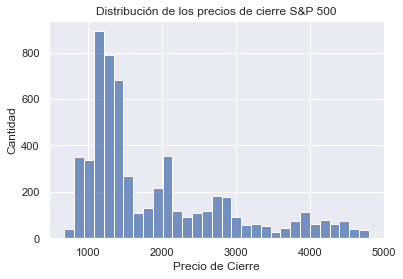

In [ ]:
# Distribución de los datos de cierre 
sns.histplot(data=sp_500, x="Close")
plt.title('Distribución de los precios de cierre S&P 500')
plt.xlabel('Precio de Cierre')
plt.ylabel('Cantidad')
plt.show()

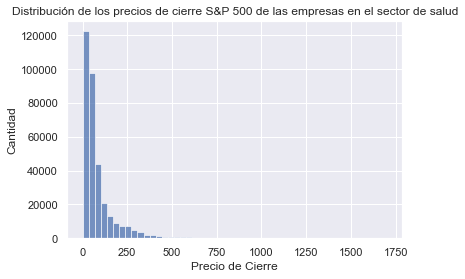

In [ ]:
# Distribución de los datos de cierre 
sns.histplot(data=sp_500_h, x="Close", bins=50)
plt.title('Distribución de los precios de cierre S&P 500 de las empresas en el sector de salud')
plt.xlabel('Precio de Cierre')
plt.ylabel('Cantidad')
plt.show()

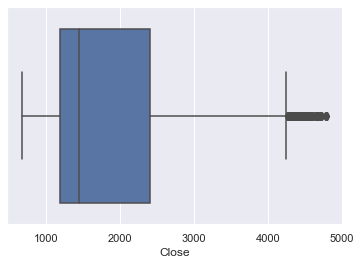

In [ ]:
# Detección de Outliers en precios de cierre
sns.boxplot( data = sp_500, x = 'Close')
plt.show()

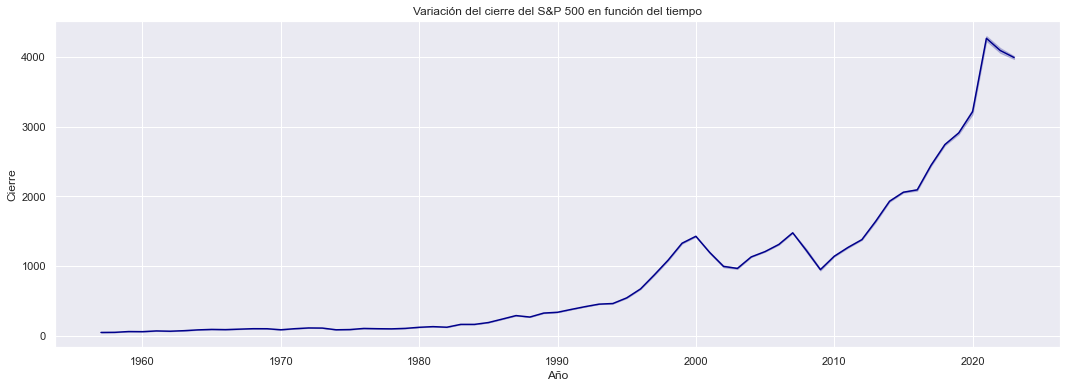

In [18]:
# Variación de los cierres a lo largo de los años.

plt.subplots(figsize=(18, 6))
sns.lineplot(data= sp_500, x= 'Year', y= 'Adj Close', color='darkblue')
plt.title('Variación del cierre del S&P 500 en función del tiempo')
plt.xlabel('Año')
plt.ylabel('Cierre')
plt.show()

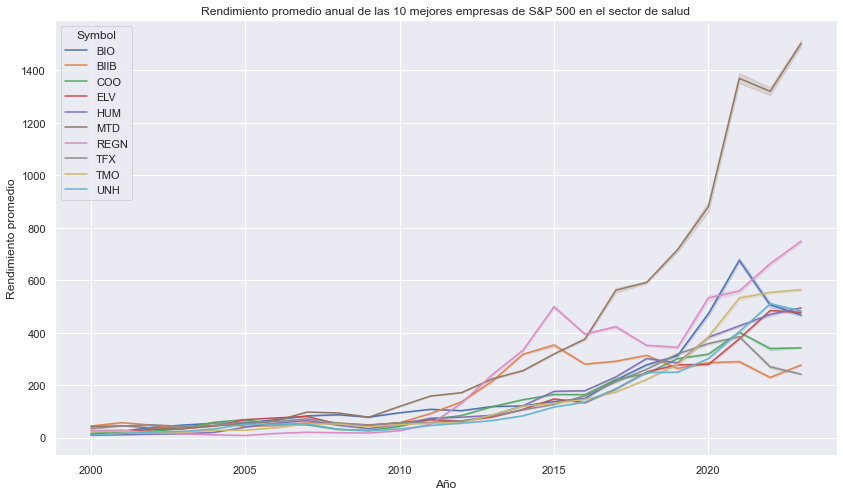

In [ ]:
# Calculamos el rendimiento promedio anual por empresa
sp_500_h_prom = sp_500_h.groupby('Symbol')['Close'].mean().reset_index()

# Seleccionamos las 10 empresas con mejores rendimientos promedio anuales
sp_500_h_top = sp_500_h_prom.sort_values('Close', ascending=False).head(10)
symbols = sp_500_h_top['Symbol'].tolist()

# Filtramos el DataFrame original para incluir solo las empresas seleccionadas
sp_500_h_top10 = sp_500_h[sp_500_h['Symbol'].isin(symbols)]

# Graficamos el rendimiento promedio anual por empresa
plt.figure(figsize=(14,8))
sns.lineplot(data=sp_500_h_top10, x='Year', y='Close', hue='Symbol')
plt.title('Rendimiento promedio anual de las 10 mejores empresas de S&P 500 en el sector de salud')
plt.xlabel('Año')
plt.ylabel('Rendimiento promedio')

plt.show()

In [ ]:
# Exportamos los datasets a formato .csv
sp_500.to_csv('sp_500.csv', index = False , header = True)
sp_500_h.to_csv('sp_500_h.csv', index = False , header = True)
sp_500_companies.to_csv('sp_500_companies.csv', index = False , header = True)